In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import missingno
from scipy import stats

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [45]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [47]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [48]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [49]:
train_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [50]:
train_data.describe(include = ['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


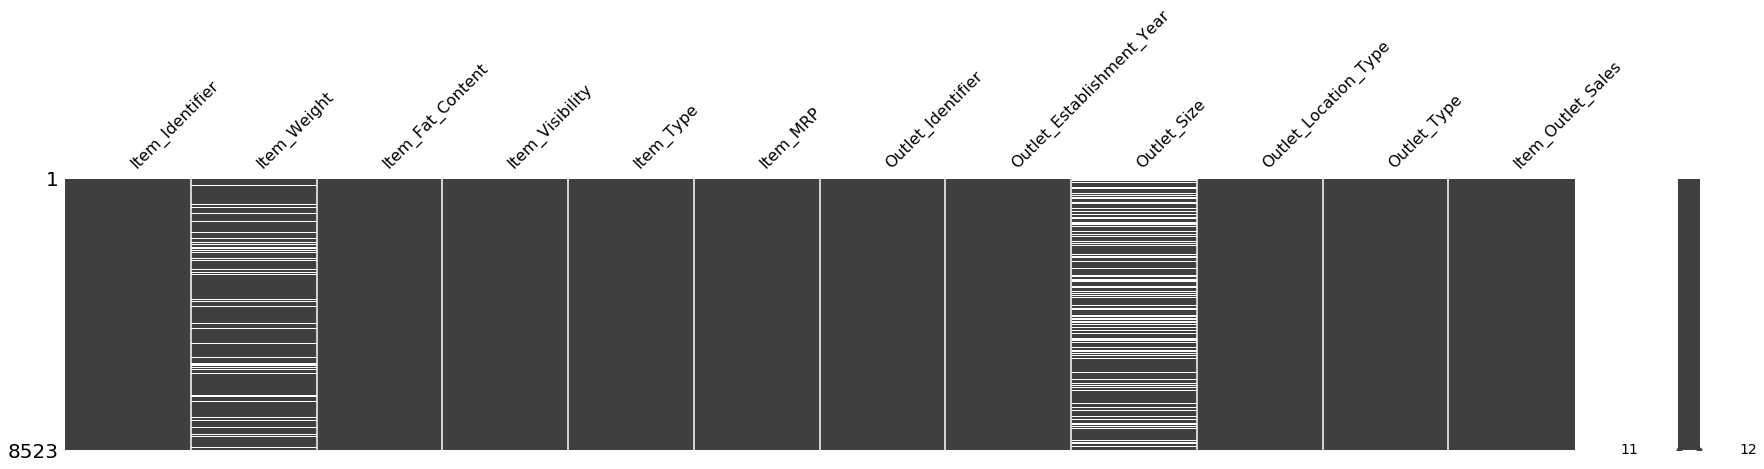

In [9]:
missingno.matrix(train_data, figsize=(30,5))

In [11]:
train_data_cat = train_data.select_dtypes(include='object').copy()

In [12]:
train_data_cat['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [13]:
len(train_data_cat['Item_Identifier'].unique())

1559

In [14]:
train_data_cat['Item_Identifier'].nunique()

1559

In [15]:
train_data_cat['Item_Identifier'].isnull().sum()

0

In [17]:
train_data_cat['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
len(train_data_cat['Outlet_Size'].unique())

4

In [19]:
train_data_cat['Outlet_Size'].isnull().sum()

2410

In [23]:
(train_data_cat['Outlet_Size'].isnull().sum()/len(train_data_cat)).round(3)*100

28.299999999999997

In [25]:
train_data_cat_stats = pd.DataFrame(columns = ['columns', 'values', 'values_count_incna',
                                       'values_count_nona', 'num_miss', 'pct_miss'])

tmp = pd.DataFrame()
for c in train_data_cat.columns:
    tmp['columns'] = [c]
    tmp['values'] = [train_data_cat[c].unique()]
    tmp['values_count_incna'] = len(list(train_data_cat[c].unique()))
    tmp['values_count_nona'] = int(train_data_cat[c].nunique())
    tmp['num_miss'] = train_data_cat[c].isnull().sum()
    tmp['pct_miss'] = (train_data_cat[c].isnull().sum()/len(train_data_cat)).round(3)*100
    train_data_cat_stats = train_data_cat_stats.append(tmp)
    
train_data_cat_stats

,columns,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,1559,0,0.0
0,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,5,0,0.0
0,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,16,0,0.0
0,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,10,0,0.0
0,Outlet_Size,"[Medium, nan, High, Small]",4,3,2410,28.3
0,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,3,0,0.0
0,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,4,0,0.0


In [26]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [27]:
train_data.fillna(-999, inplace = True)
test_data.fillna(-999, inplace = True)

In [28]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [57]:
X = train_data.drop(['Item_Outlet_Sales'],axis = 1)
y = train_data.Item_Outlet_Sales

from sklearn.model_selection import train_test_split
X_train_full, y_train, X_valid_full, y_valid = train_test_split(X,y,
                                                                train_size = 0.7,
                                                                test_size =0.3,
                                                                random_state = 1)


In [59]:
categorical_cols = [cname for cname in X_train_full.columns 
                    if X_train_full[cname].nunique() < 20 and 
                   X_train_full[cname].dtype == 'object']
numerical_cols = [cname for cname in X_train_full.columns 
                    if X_train_full[cname].dtype in ['int64', 'float64']]


my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()





KeyError: "None of [Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',\n       'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 'Item_Visibility',\n       'Item_MRP', 'Outlet_Establishment_Year'],\n      dtype='object')] are in the [index]"

In [37]:
numerical_transformer = SimpleImputer(strategy = 'constant')
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [30]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_valid, y_valid = train_test_split(X,y, train_size = 0.7, test_size =0.3, random_state = 1 )

In [31]:
from sklearn.tree import DecisionTreeRegressor
big_mart_model = DecisionTreeRegressor(random_state = 1)
big_mart_model.fit(X_train,y_train)

ValueError: could not convert string to float: 'NCY53'